In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv(r"C:\Users\Owner\Desktop\project 1\data.csv")
data.head

<bound method NDFrame.head of              id                                               name    host_id  \
0          2539                 Clean & quiet apt home by the park       2787   
1          2595                              Skylit Midtown Castle       2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !       4632   
3          3831                    Cozy Entire Floor of Brownstone       4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park       7192   
5          5099          Large Cozy 1 BR Apartment In Midtown East       7322   
6          5121                                    BlissArtsSpace!       7356   
7          5178                   Large Furnished Room Near B'way        8967   
8          5203                 Cozy Clean Guest Room - Family Apt       7490   
9          5238                 Cute & Cozy Lower East Side 1 bdrm       7549   
10         5295                   Beautiful 1br on Upper West Side       7702  

In [8]:
host_counts = data['host_id'].value_counts()
house_host_counts = pd.DataFrame(host_counts)['host_id'].value_counts()
MAX_HOUSE_NUM = 10

In [9]:
counter = dict()
for i in range(1, MAX_HOUSE_NUM+1):
    counter[i] = 0

for house, hosts in house_host_counts.items():
    if house >= MAX_HOUSE_NUM:
        counter[MAX_HOUSE_NUM] += hosts
    else:
        counter[house] += hosts


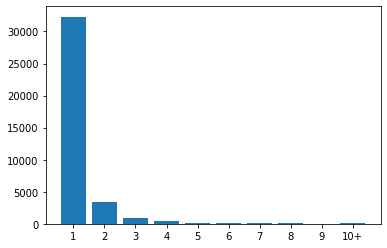

In [10]:

plt.bar(counter.keys(), counter.values())
plt.xticks([i for i in range(1, MAX_HOUSE_NUM+1)],
           [i for i in range(1, MAX_HOUSE_NUM)] + ['{}+'.format(MAX_HOUSE_NUM)])
plt.show()



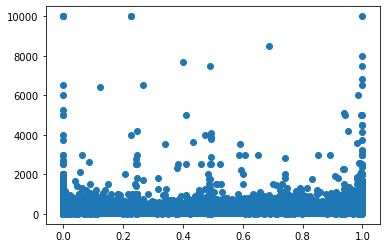

In [40]:
occupancy_rate =data['availability_365']/365
data['occupancy_rate'] = occupancy_rate 
price = data['price']
plt.scatter( data['occupancy_rate'], data['price'])

In [36]:
data['occupancy_rate']

0        1.000000
1        0.972603
2        1.000000
3        0.531507
4        0.000000
5        0.353425
6        0.000000
7        0.602740
8        0.000000
9        0.515068
10       0.016438
11       0.106849
12       0.860274
13       0.912329
14       0.000000
15       0.126027
16       0.879452
17       0.032877
18       0.057534
19       0.682192
20       0.000000
21       0.950685
22       0.997260
23       0.832877
24       0.638356
25       0.232877
26       0.000000
27       0.205479
28       0.852055
29       0.183562
           ...   
48865    0.216438
48866    0.435616
48867    0.926027
48868    1.000000
48869    0.019178
48870    0.060274
48871    0.084932
48872    0.024658
48873    0.994521
48874    0.060274
48875    0.493151
48876    0.071233
48877    0.043836
48878    0.471233
48879    0.060274
48880    1.000000
48881    0.041096
48882    0.084932
48883    0.997260
48884    0.934247
48885    0.967123
48886    0.482192
48887    1.000000
48888    0.084932
48889    0

In [54]:
airbnb_df = data.loc[data['availability_365'] == 0]

In [55]:
neigh_grp = airbnb_df["neighbourhood_group"]
price = airbnb_df["price"]
neigh = airbnb_df["neighbourhood"]
lat = airbnb_df["latitude"]
long = airbnb_df["longitude"]
df_airbnb_data = pd.DataFrame({"neighbourhood_group" : neigh_grp, "price": price , "neighbourhood" : neigh,"latitude":lat,"longitude":long})
df_airbnb_data.head()

,neighbourhood_group,price,neighbourhood,latitude,longitude
4,Manhattan,80,East Harlem,40.79851,-73.94399
6,Brooklyn,60,Bedford-Stuyvesant,40.68688,-73.95596
8,Manhattan,79,Upper West Side,40.80178,-73.96723
14,Manhattan,120,West Village,40.73530,-74.00525
20,Brooklyn,299,Williamsburg,40.71842,-73.95718


In [56]:
avg_neigh_grp_price = df_airbnb_data.groupby(["neighbourhood_group"]).mean()
df_avg_neigh_grp_price = avg_neigh_grp_price.reset_index()
# Average price of BNB in each neighbourhood group of NYC
df = df_avg_neigh_grp_price.rename(columns = {"neighbourhood_group":"Neighbourhood Group","price":"Average Price"})
df_final_avgprice = df.drop(['latitude', 'longitude'], axis=1)
df_final_avgprice

,Neighbourhood Group,Average Price
0,Bronx,79.694915
1,Brooklyn,111.146099
2,Manhattan,167.879659
3,Queens,97.908626
4,Staten Island,119.404762


In [57]:
average_price_nyc = df_final_avgprice["Average Price"].mean()
average_price_nyc

115.20681223249662

In [58]:
price_diff_percent_manhattan = ((df_final_avgprice["Average Price"][2]-average_price_nyc)/average_price_nyc)*100
price_diff_percent_manhattan

45.72025394173509

In [59]:
price_diff_bronx_manha = ((df_final_avgprice["Average Price"][0] - df_final_avgprice["Average Price"][2])/df_final_avgprice["Average Price"][2])*100
price_diff_bronx_manha

-52.528546003757604

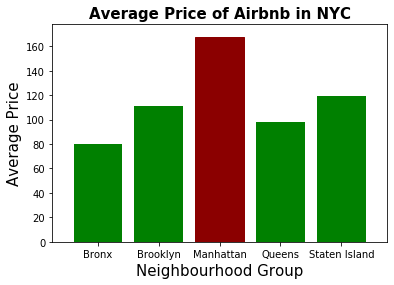

In [60]:
new_price = df_avg_neigh_grp_price["price"]
new_neigh_grp = df_avg_neigh_grp_price["neighbourhood_group"]

# Bar graph to show average prices of each neighbourhood group
x_axis = np.arange(len(new_price))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, new_neigh_grp)

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(new_price)+ 10)

plt.title("Average Price of Airbnb in NYC",fontsize = 15, weight = 'bold')
plt.xlabel("Neighbourhood Group", fontsize = 15)
plt.ylabel("Average Price", fontsize = 15)


barplot = plt.bar(x_axis, new_price, color="green", align="center")
barplot[2].set_color('darkred')

plt.savefig("AveragePriceBarChart.png")
plt.show()